# Movie reviews

This notebook takes you though a complete iteration of Machine Learning Assignment 1 - Movie reviews. The assignment details (including links to download the data) can be found [here](https://docs.google.com/document/d/1WGYw99e5q6j5V0Zrf2HveagU6URt_kVvdR8B9HYQ99E/edit?usp=sharing). 

In [103]:
# all imports and magic commands
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_measures import BinaryClassificationPerformance
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import Ridge
%matplotlib inline

# Function for feature building and extraction on natural language data

In [104]:
# function that takes raw data and completes all preprocessing required before model fits
def process_raw_data(fn, my_random_seed, test=False):
    # read and summarize data
    movie_data = pd.read_csv(fn, sep='\t')
    print("movie_data is:", type(movie_data))
    print("movie_data has", movie_data.shape[0], "rows and", movie_data.shape[1], "columns", "\n")
    print("the data types for each of the columns in movie_data:")
    print(movie_data.dtypes, "\n")
    print("the first 10 rows in movie_data:")
    print(movie_data.head(5))
    if (not test):
        print("The rate of 'good' movie reviews in the dataset: ")
        print(movie_data['sentiment'].mean())

    # vectorize Bag of Words from review text; as sparse matrix
    if (not test): # fit_transform()
        hv = HashingVectorizer(n_features=2 ** 17, alternate_sign=False)
        X_hv = hv.fit_transform(movie_data.review)
        fitted_transformations.append(hv)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    else: # transform() 
        X_hv = fitted_transformations[0].transform(movie_data.review)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    

        # vectorize Bag of Words from review text; as sparse matrix
    if (not test): # fit_transform()
        #Tricia is a good girl in Indonesia
        #Leffin is a good boy in India
        #n_features = 2 ** 3 = 000,001,010,011,100,101,110,111
        #hash = algorithm that converts anything to numbers - encryption, no personalized dictionary
        #2**3 = faster to run = more collision  / 2**20 = longer to run = lesser collision
        #2**17 = good base
        
        #countVectorizer = final output is a number, not using a bag of words, it has a dictionary and it is fine because we have a set number of reviews
        #not good = bag of words, hashing vectorizer would not be able to detect it
        #ngram_range = 1,2 = Tricia, is , Tricia is
        #maximum number is high = takes longer to run
        #strip_accents = remove accents
        #ascii : dictionary of characters
        #tokenizer: looking is look, looks is look
        #remove stop_words {english}
        #max_features: limit the features
        cv = CountVectorizer(ngram_range=(1,3), stop_words='english', strip_accents='ascii')
        X_cv = cv.fit_transform(movie_data.review)
        fitted_transformations.append(cv)
        print("Shape of CountVectorizer X:")
        print(X_cv.shape)
    else: # transform() 
        X_cv = fitted_transformations[0].transform(movie_data.review)
        print("Shape of CountVectorizer X:")
        print(X_cv.shape)
        
        #strip_accents : {'ascii'}

        
        
   # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
    if (not test):
        transformer = TfidfTransformer()
        X_tfidf = transformer.fit_transform(X_cv)
        fitted_transformations.append(transformer)
    else:
        X_tfidf = fitted_transformations[1].transform(X_cv)
    
     #create additional quantitative features
     #features from Amazon.csv to add to feature set
    movie_data['word_count'] = movie_data['review'].str.split(' ').str.len()
    movie_data['punc_count'] = movie_data['review'].str.count("\.")

    X_quant_features = movie_data[["word_count", "punc_count"]]
    print("Look at a few rows of the new quantitative features: ")
    print(X_quant_features.head(10))
    
    # Combine all quantitative features into a single sparse matrix
    X_quant_features_csr = csr_matrix(X_quant_features)
    X_combined = hstack([X_tfidf, X_quant_features_csr])
    X_matrix = csr_matrix(X_combined) # convert to sparse matrix
    print("Size of combined bag of words and new quantitative variables matrix:")
    print(X_matrix.shape)
    
    # Create `X`, scaled matrix of features
     #feature scaling
    if (not test):
        sc = StandardScaler(with_mean=False)
        X = sc.fit_transform(X_matrix)
        fitted_transformations.append(sc)
        print(X.shape)
        y = movie_data['sentiment']
    else:
        X = fitted_transformations[2].transform(X_matrix)
        print(X.shape)
    
    # Create Training and Test Sets
    # enter an integer for the random_state parameter; any integer will work
    if (test):
        X_submission_test = X
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(movie_data, X_submission_test)
    else: 
        X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = train_test_split(X, y, movie_data, test_size=0.2, random_state=my_random_seed)
        print("Shape of X_train and X_test:")
        print(X_train.shape)
        print(X_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of X_raw_train and X_raw_test:")
        print(X_raw_train.shape)
        print(X_raw_test.shape)
        print('SUCCESS!')
        return(X_train, X_test, y_train, y_test, X_raw_train, X_raw_test)

# Create training and test sets from function

In [105]:
# create an empty list to store any use of fit_transform() to transform() later
# it is a global list to store model and feature extraction fits
fitted_transformations = []

# OK CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = process_raw_data(fn='/users/kinetic.tricia/moviereviews_train.tsv', my_random_seed=49)

print("Number of fits stored in `fitted_transformations` list: ")
print(len(fitted_transformations))

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 3 columns 

the data types for each of the columns in movie_data:
id           object
sentiment     int64
review       object
dtype: object 

the first 10 rows in movie_data:
       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...
The rate of 'good' movie reviews in the dataset: 
0.5
Shape of HashingVectorizer X:
(25000, 131072)
Shape of CountVectorizer X:
(25000, 4302235)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         433          20
1         158          16
2         378          20
3      

# Fit (and tune) Various Models

### MODEL: ordinary least squares

In [106]:
from sklearn import linear_model
ols = linear_model.SGDClassifier(loss="squared_loss")
ols.fit(X_train, y_train)

ols_performance_train = BinaryClassificationPerformance(ols.predict(X_train), y_train, 'ols_train')
ols_performance_train.compute_measures()
print(ols_performance_train.performance_measures)

{'Pos': 10009, 'Neg': 9991, 'TP': 3246, 'TN': 6364, 'FP': 3627, 'FN': 6763, 'Accuracy': 0.4805, 'Precision': 0.47228284591881275, 'Recall': 0.32430812268957937, 'desc': 'ols_train'}


### MODEL: SVM, linear

In [107]:
from sklearn import linear_model
svm = linear_model.SGDClassifier()
svm.fit(X_train, y_train)

svm_performance_train = BinaryClassificationPerformance(svm.predict(X_train), y_train, 'svm_train')
svm_performance_train.compute_measures()
print(svm_performance_train.performance_measures)

{'Pos': 10009, 'Neg': 9991, 'TP': 10009, 'TN': 9991, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'svm_train'}


### MODEL: logistic regression

In [108]:
from sklearn import linear_model
lgs = linear_model.SGDClassifier(loss='log')
lgs.fit(X_train, y_train)

lgs_performance_train = BinaryClassificationPerformance(lgs.predict(X_train), y_train, 'lgs_train')
lgs_performance_train.compute_measures()
print(lgs_performance_train.performance_measures)

{'Pos': 10009, 'Neg': 9991, 'TP': 10009, 'TN': 9991, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'lgs_train'}


### MODEL: Naive Bayes

In [109]:
from sklearn.naive_bayes import MultinomialNB
nbs = MultinomialNB()
nbs.fit(X_train, y_train)

nbs_performance_train = BinaryClassificationPerformance(nbs.predict(X_train), y_train, 'nbs_train')
nbs_performance_train.compute_measures()
print(nbs_performance_train.performance_measures)

{'Pos': 10009, 'Neg': 9991, 'TP': 10009, 'TN': 9991, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'nbs_train'}


### MODEL: Perceptron

In [110]:
from sklearn import linear_model
prc = linear_model.SGDClassifier(loss='perceptron')
prc.fit(X_train, y_train)

prc_performance_train = BinaryClassificationPerformance(prc.predict(X_train), y_train, 'prc_train')
prc_performance_train.compute_measures()
print(prc_performance_train.performance_measures)

{'Pos': 10009, 'Neg': 9991, 'TP': 10009, 'TN': 9991, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'prc_train'}


### MODEL: Ridge Regression Classifier

In [111]:
from sklearn import linear_model
#rdg = linear_model.RidgeClassifier(alpha=10)
#rdg = linear_model.RidgeClassifier(alpha=0.1)
rdg = linear_model.RidgeClassifier(alpha=1.0)
#rdg = linear_model.RidgeClassifier(alpha=0.01)
#rdg = linear_model.RidgeClassifier(alpha=0.001)
rdg.fit(X_train, y_train)

rdg_performance_train = BinaryClassificationPerformance(rdg.predict(X_train), y_train, 'rdg_train')
rdg_performance_train.compute_measures()
print(rdg_performance_train.performance_measures)

{'Pos': 10009, 'Neg': 9991, 'TP': 10009, 'TN': 9991, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_train'}


### MODEL: Random Forest Classifier

In [112]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(max_depth=2, random_state=0)
rdf.fit(X_train, y_train)

rdf_performance_train = BinaryClassificationPerformance(rdf.predict(X_train), y_train, 'rdf_train')
rdf_performance_train.compute_measures()
print(rdf_performance_train.performance_measures)

{'Pos': 10009, 'Neg': 9991, 'TP': 8634, 'TN': 5057, 'FP': 4934, 'FN': 1375, 'Accuracy': 0.68455, 'Precision': 0.6363502358490566, 'Recall': 0.8626236387251474, 'desc': 'rdf_train'}


### ROC plot to compare performance of various models and fits

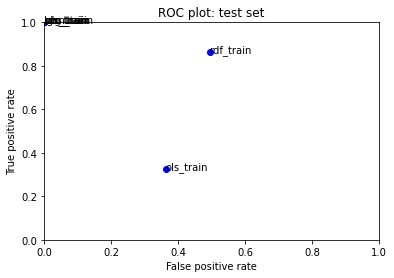

In [113]:
fits = [ols_performance_train, svm_performance_train, lgs_performance_train, nbs_performance_train, prc_performance_train, rdg_performance_train, rdf_performance_train]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

### looking at reviews based on their classification

Let's say we decide that Ordinary Least Squares (OLS) Regression is the best model for generalization. Let's take a look at some of the reviews and try to make a (subjective) determination of whether it's generalizing well. 

In [114]:
ols_predictions = ols.predict(X_train)

### let's look at some false positives:

In [115]:
# false positives

print("Examples of false positives:")

import random, time

for i in range(0, len(ols_predictions)):
    if (ols_predictions[i] == 1):
        if (X_raw_train.iloc[i]['sentiment'] == 0):
            if (random.uniform(0, 1) < 0.05): # to print only 5% of the false positives
                print(i)
                print(X_raw_train.iloc[i]['review'])
                print('* * * * * * * * * ')


Examples of false positives:
171
My wife and I found this film to be highly unsatisfying. While the plot keeps you interested and busy wondering just what is going on, when you leave the theater, there are just too many loose ends that make no sense at all. (SPOILERS AHEAD) Christopher Plummer, enormously wealthy head of a NY bank has a terrible hidden secret. Profiting from WW II deals with the Nazis and hiding loot stolen from Jews, he keeps the evidence (including diamonds and documents with the Nazi swastika) in a safety deposit box in his bank. Why? If he wants this never to be revealed, why did he not burn and destroy the documents years ago? And the diamonds? Obviously, he does not need them - why keep them rather than dispose of them? How did the bank robbers find out his secret? How did they know to zero in on this very safety deposit box #232? Ace detective Denzel Washington also discovers bank records show SD Boxes No's 231 and 233, but no #232. Curious. He meticulously foun

6801
I grew up on the 'Superman II' theatrical version (\S2T\") and as a kid, I loved it more than Part I since not only did it contain more Superman and three Superman-type villains, it started off with a bang  the best Clark Kent to Superman transformations and rescue scenes. Kids no longer had to impatiently wait for Superman to appear on screen, as in part I. Now as an adult, I can see how the mighty had fallen with S2T (See: my review.) I've always heard of the back-story on how they prematurely and unjustifiably fired the original's director, Richard Donner from part II. (It must have been a rarity back then to film two separate movies simultaneously, now it's common: 'Back to the Future' and 'Matrix' 2 & 3 for example.) Unfortunately, after finally seeing the Richard Donner Cut (or, \"S2RD\") I still can't fully recommend it. Gone, was the great Superman change scene, the entire Paris rescue, as was the wonderful recap of part I in S2T's opening. In fact, they all but wrote the

12590
This movie is so awful, it is hard to find the right words to describe it!<br /><br />At first the story is so ridiculous.A narrow-minded human can write a better plot! The actors are boring and untalented, perhaps they were compelled to play in this cheesy Film.<br /><br />The camera receptions of the National Forest are the only good in this whole movie. I should feel ashame, because I paid for this lousy Picture.<br /><br />Hopefully nobody makes a sequel or make a similar film with such a worse storyline :-)
* * * * * * * * * 
12687
'The Vampire Bat' is definitely of interest, being one of the early genre-setting horror films of the 1930's, but taken in isolation everything is a bit too creaky for any genuine praise.<br /><br />The film is set in a European village sometime in the 19th Century, where a series of murders are being attributed to vampirism by the suspicious locals. There is a very similar feel to James Whale's 'Frankenstein' and this is compounded by the introdu

17890
It is obviously illegal. Pedophiles pray on stuff like this. How did they get away with making such a movie? This movie is all summed up in one word, SICK. Where do people get off making, and watching these kinds of films. As I was watching the movie I didn't actually think they would allow this kid that is say maybe 12 if that actually sleep with this woman. Sorry if this is a spoiler to you but I would have rater not seen this. Where has the sanity of these people gone? Maybe the makers of this movie are pedophiles? Our society today is filled with all types of sexual predators that pray upon children, yet film makers make these types of movies that do nothing but provoke this type of behavior. I noticed that on a previous comment someone asked if there was a version where it showed them naked. This is a kid here, and someone is asking something like this? What is wrong with this picture?
* * * * * * * * * 
17965
I will be short...This film is an embarrassment to everyone excep

---

# <span style="color:red">WARNING: Don't look at test set performance too much!</span>

---

The following cells show performance on your test set. Do not look at this too often! 

# Look at performance on the test set

### MODEL: ordinary least squares

In [116]:
ols_performance_test = BinaryClassificationPerformance(ols.predict(X_test), y_test, 'ols_test')
ols_performance_test.compute_measures()
print(ols_performance_test.performance_measures)

{'Pos': 2491, 'Neg': 2509, 'TP': 794, 'TN': 1626, 'FP': 883, 'FN': 1697, 'Accuracy': 0.484, 'Precision': 0.47346451997614786, 'Recall': 0.31874749096748295, 'desc': 'ols_test'}


### MODEL: SVM, linear

In [117]:
svm_performance_test = BinaryClassificationPerformance(svm.predict(X_test), y_test, 'svm_test')
svm_performance_test.compute_measures()
print(svm_performance_test.performance_measures)

{'Pos': 2491, 'Neg': 2509, 'TP': 2032, 'TN': 2043, 'FP': 466, 'FN': 459, 'Accuracy': 0.815, 'Precision': 0.8134507606084868, 'Recall': 0.8157366519470093, 'desc': 'svm_test'}


### MODEL: logistic regression

In [118]:
lgs_performance_test = BinaryClassificationPerformance(lgs.predict(X_test), y_test, 'lgs_test')
lgs_performance_test.compute_measures()
print(lgs_performance_test.performance_measures)

{'Pos': 2491, 'Neg': 2509, 'TP': 2049, 'TN': 2069, 'FP': 440, 'FN': 442, 'Accuracy': 0.8236, 'Precision': 0.823222177581358, 'Recall': 0.8225612203934163, 'desc': 'lgs_test'}


### MODEL: Naive Bayes

In [119]:
nbs_performance_test = BinaryClassificationPerformance(nbs.predict(X_test), y_test, 'nbs_test')
nbs_performance_test.compute_measures()
print(nbs_performance_test.performance_measures)

{'Pos': 2491, 'Neg': 2509, 'TP': 1764, 'TN': 2274, 'FP': 235, 'FN': 727, 'Accuracy': 0.8076, 'Precision': 0.8824412206103052, 'Recall': 0.7081493376154155, 'desc': 'nbs_test'}


### MODEL: Perceptron

In [120]:
prc_performance_test = BinaryClassificationPerformance(prc.predict(X_test), y_test, 'prc_test')
prc_performance_test.compute_measures()
print(prc_performance_test.performance_measures)

{'Pos': 2491, 'Neg': 2509, 'TP': 2043, 'TN': 2028, 'FP': 481, 'FN': 448, 'Accuracy': 0.8142, 'Precision': 0.8094294770206022, 'Recall': 0.8201525491770373, 'desc': 'prc_test'}


### MODEL: Ridge Regression Classifier

In [121]:
rdg_performance_test = BinaryClassificationPerformance(rdg.predict(X_test), y_test, 'rdg_test')
rdg_performance_test.compute_measures()
print(rdg_performance_test.performance_measures)

{'Pos': 2491, 'Neg': 2509, 'TP': 2306, 'TN': 2057, 'FP': 452, 'FN': 185, 'Accuracy': 0.8726, 'Precision': 0.836113125453227, 'Recall': 0.9257326374949819, 'desc': 'rdg_test'}


### MODEL: Random Forest Classifier

In [122]:
rdf_performance_test = BinaryClassificationPerformance(rdf.predict(X_test), y_test, 'rdf_test')
rdf_performance_test.compute_measures()
print(rdf_performance_test.performance_measures)

{'Pos': 2491, 'Neg': 2509, 'TP': 2077, 'TN': 1192, 'FP': 1317, 'FN': 414, 'Accuracy': 0.6538, 'Precision': 0.6119622863877431, 'Recall': 0.8338016860698515, 'desc': 'rdf_test'}


### ROC plot to compare performance of various models and fits

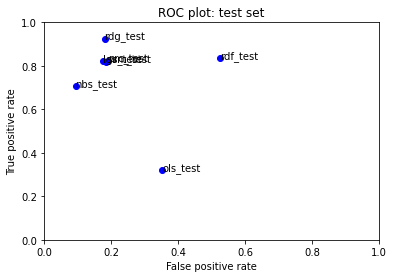

In [123]:
fits = [ols_performance_test, svm_performance_test, lgs_performance_test, nbs_performance_test, prc_performance_test, rdg_performance_test, rdf_performance_test]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

---

# <span style="color:red">SUBMISSION</span>

---

In [ ]:
# read in test data for submission
# OK CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
raw_data, X_test_submission = process_raw_data(fn='/users/kinetic.tricia/moviereviews_test.tsv', my_random_seed=49, test=True)
print("Number of rows in the submission test set (should be 25,000): ")

---

Choose a <span style="color:red">*single*</span> model for your submission. In this code, I am choosing the Ordinary Least Squares model fit, which is in the `ols` object. But you should choose the model that is performing the best for you! 

In [ ]:
# store the id from the raw data
my_submission = pd.DataFrame(raw_data["id"])
# concatenate predictions to the id
my_submission["prediction"] = ols.predict(X_test_submission)
# look at the proportion of positive predictions
print(my_submission['prediction'].mean())

In [ ]:
raw_data.head()

In [ ]:
my_submission.head()

In [ ]:
my_submission.shape

In [ ]:
# export submission file as pdf
# CHANGE FILE PATH: 
my_submission.to_csv('/users/kinetic.tricia/moviereviews_submission.csv', index=False)

# Submit to Canvas: 1) the CSV file that was written in the previous cell and 2) the url to the repository (GitHub or other) that contains your code and documentation